In [7]:
using LinearAlgebra, Plots

In [20]:
function infty_norm(x)
    max = 0;
    for i in eachindex(x)
        if( max < abs(x[i]) )
            max = abs(x[i]);
        end
    end

    return max;
end

infty_norm (generic function with 1 method)

In [61]:
function gradient_descent(a::Float64, s::Float64, ϵ::Float64,
    M::Int64  , x::Vector{Float64}, flag::Bool)
    k     = 0; # COUNTER
    f, ∇f = cost(x, true);
    μ     = infty_norm(∇f);
    x_ant = 0;
    ∇f_ant= 0;

    while( (μ >= ϵ) && (k < M) )
        #println(x);
        t_k = 1;
        if( flag == true && k != 0)
            t_k = norm(x - x_ant, 2) / norm(∇f - ∇f_ant, 2);
        end

        armijo = a * dot(∇f, ∇f);
        while( cost(x - t_k * ∇f, false) > (f - t_k*armijo) )
            t_k = s * t_k;
        end

        x_ant  = x;
        ∇f_ant = ∇f;
        x      = x - t_k * ∇f;
        f, ∇f  = cost(x, true);
        μ      = infty_norm(∇f);
        k      += 1;
    end

    println(k);
    return x;
end

gradient_descent (generic function with 1 method)

In [36]:
global u₁, u₂, w;
u₁ = Float64[];
u₂ = Float64[];
w  = Float64[];

filepath = "curva_treino";
file     = open(filepath);
for line in eachline(file)
    row = parse.( Float64, split(line) );
    push!( u₁, row[1] );
    push!( u₂, row[2] );
    push!( w , row[3] );
end

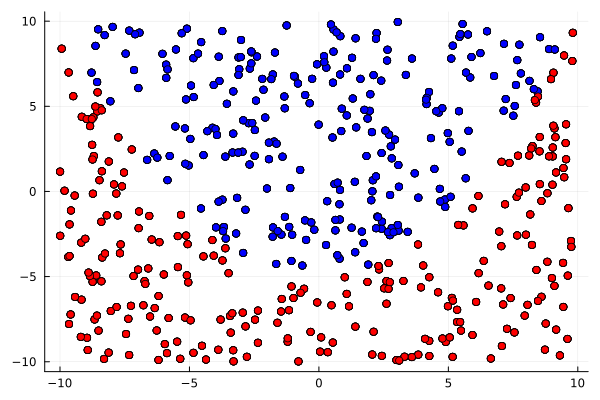

In [37]:
colors = ifelse.( w .== 1, "blue", "red" );
plt = scatter!(u₁, u₂, color = colors, legend = false)

In [38]:
function ϕ( x::Float64 )
    a = 2 / π;
    f = a ⋅ atan( x );
    g = a ⋅ 1 / ( 1 + x ⋅ x );
    
    return f, g;
end

ϕ (generic function with 1 method)

In [39]:
function cost( x::Vector{Float64}, flag::Bool )
    F = 0;
    G = zeros( length(x) );
    for i in eachindex(u₁)
        b = u₁[i] ⋅ x[1] + u₂[i] ⋅ x[3] + x[5];
        c = u₁[i] ⋅ x[2] + u₂[i] ⋅ x[4] + x[6];
        ϕ_value_b, ϕ_prime_value_b = ϕ(b);
        ϕ_value_c, ϕ_prime_value_c = ϕ(c);
        a = ϕ_value_b ⋅ x[7] + ϕ_value_c ⋅ x[8] + x[9];
        ϕ_value_a, ϕ_prime_value_a = ϕ(a);
        
        F += ϕ_value_a;
        if(flag)
            G[9] += ϕ_prime_value_a;
            G[8]  = ϕ_prime_value_a ⋅ ϕ_value_c;
            G[7]  = ϕ_prime_value_a ⋅ ϕ_value_b;
            G[6]  = ϕ_prime_value_a ⋅ x[8] ⋅ ϕ_prime_value_c;
            G[5]  = ϕ_prime_value_a ⋅ x[7] ⋅ ϕ_prime_value_b;
            G[4]  = G[6] ⋅ u₂[i];
            G[3]  = G[5] ⋅ u₂[i];
            G[2]  = G[6] ⋅ u₁[i];
            G[1]  = G[5] ⋅ u₁[i];
        end
    end
    
    if( flag )
        return F, G;
    else
        return F;
    end
end

cost (generic function with 1 method)

In [65]:
a = 10e-4;
s = 0.5  ;
ϵ = 1e-5 ;
M = 1000 ;
x = [0.0; 0.0; 0.0; 1.0; 1.0; -1.0; 0.0; 0.0; 0.0; 0.0; 1.0];
x_final = gradient_descent(a, s, ϵ, M, x, false);

1000


In [66]:
x_final

11-element Vector{Float64}:
   -0.0035577745623978263
    0.0001875439861356338
   -0.004556025623220863
    1.0002401656404412
    1.00061292711293
   -1.0000323097464303
   -0.32145784410753125
    0.5945087153246872
 -321.4136639048209
    0.0
    1.0

In [91]:
function loop_cost()
    M = 1000;
    x_best = zeros(10);
    best_cost = 0;
    for i = 1:M
        x_testing = (2 .⋅ rand(10) .- 1) .⋅ 10;
        cost_value = cost(x_testing, false);
        if( cost_value < best_cost )
            x_best = x_testing;
        end
    end
    
    return x_best;
end

loop_cost (generic function with 1 method)

In [92]:
loop_cost()

10-element Vector{Float64}:
 -1.086603423156618
  5.111048429863523
 -5.753899484332557
  3.2469061640726404
 -5.90001372884994
  6.553876099591571
 -9.248218082640927
 -6.47773877792897
 -9.851426871656857
 -0.7847298540206116

In [82]:
(2 .⋅ rand(10) .- 1) .⋅ 10

10-element Vector{Float64}:
  5.389557742678377
 -6.046627364458963
  3.9618204533873747
  9.442836773831756
  5.143731079001168
 -0.10300724995282451
 -5.343052091748182
 -0.711903277035355
 -9.175538307808623
  7.456355948690465

In [54]:
global expected_classification;
expected_classification = Float64[];

In [62]:
function classifica_pontos( x::Vector{Float64},  )
    empty!(expected_classification);
    for i in eachindex(u₁)
        b = u₁[i] ⋅ x[1] + u₂[i] ⋅ x[3] + x[5];
        c = u₁[i] ⋅ x[2] + u₂[i] ⋅ x[4] + x[6];
        ϕ_value_b, ϕ_prime_value_b = ϕ(b);
        ϕ_value_c, ϕ_prime_value_c = ϕ(c);
        a = ϕ_value_b ⋅ x[7] + ϕ_value_c ⋅ x[8] + x[9];
        ϕ_value_a, ϕ_prime_value_a = ϕ(a);
        
        sinal = sign(ϕ_value_a);
        push!( expected_classification, sinal );
    end
end

classifica_pontos (generic function with 1 method)

In [89]:
classifica_pontos( x_final )

In [90]:
correct_guesses = 0;
total_guesses   = 0;
for i in eachindex(u₁)
    if( w[i] == expected_classification )
         correct_guesses = correct_guesses + 1;
    end
    
    total_guesses = total_guesses + 1;
end
println( correct_guesses / total_guesses )

0.0
